In [86]:
import warnings 
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tmp1= pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/data/finedust/일별평균대기오염도_2020.csv',encoding='cp949')
tmp1.head(2)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20200101,강남구,0.037,0.003,0.7,0.003,30.0,22.0
1,20200101,강동구,0.036,0.005,0.5,0.003,35.0,27.0


In [ ]:
tmp2= pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/data/finedust/일별평균대기오염도_2019.csv',encoding='cp949')
tmp2.head(2)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20190101,강남구,0.028,0.012,0.6,0.005,37.0,31.0
1,20190101,강남대로,0.041,0.010,0.9,0.004,40.0,28.0


교통량 지점별 데이터

In [ ]:
key = 'key'
url = f'http://openapi.seoul.go.kr:8088/{key}/xml/SpotInfo/1/169/'

In [ ]:
!pip install xmltodict # xml 사용하기 위해선 설치 필수

In [87]:
import requests
import xmltodict

In [ ]:
response = requests.get(url)
result = xmltodict.parse( response.text )

In [ ]:
response.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><SpotInfo><list_total_count>169</list_total_count><RESULT><CODE>INFO-000</CODE><MESSAGE>정상 처리되었습니다</MESSAGE></RESULT><row><spot_num>A-01</spot_num><spot_nm>성산로(금화터널)</spot_nm><grs80tm_x>195489</grs80tm_x><grs80tm_y>452136</grs80tm_y></row><row><spot_num>A-02</spot_num><spot_nm>사직로(사직터널)</spot_nm><grs80tm_x>196756.776106</grs80tm_x><grs80tm_y>452546.638644</grs80tm_y></row><row><spot_num>A-03</spot_num><spot_nm>자하문로(자하문터널)</spot_nm><grs80tm_x>197216.855046</grs80tm_x><grs80tm_y>454350.990432</grs80tm_y></row><row><spot_num>A-04</spot_num><spot_nm>대사관로(삼청터널)</spot_nm><grs80tm_x>198648.893154</grs80tm_x><grs80tm_y>455200.108465</grs80tm_y></row><row><spot_num>A-05</spot_num><spot_nm>율곡로(안국역)</spot_nm><grs80tm_x>198645.671347</grs80tm_x><grs80tm_y>452937.216603</grs80tm_y></row><row><spot_num>A-06</spot_num><spot_nm>창경궁로(서울여자대학교)</spot_nm><grs80tm_x>199825.89671</grs80tm_x><grs80tm_y>453668.322568</grs80tm_y></row><row><spot_num>A-07<

In [ ]:
result

OrderedDict([('SpotInfo',
              OrderedDict([('list_total_count', '169'),
                           ('RESULT',
                            OrderedDict([('CODE', 'INFO-000'),
                                         ('MESSAGE', '정상 처리되었습니다')])),
                           ('row',
                            [OrderedDict([('spot_num', 'A-01'),
                                          ('spot_nm', '성산로(금화터널)'),
                                          ('grs80tm_x', '195489'),
                                          ('grs80tm_y', '452136')]),
                             OrderedDict([('spot_num', 'A-02'),
                                          ('spot_nm', '사직로(사직터널)'),
                                          ('grs80tm_x', '196756.776106'),
                                          ('grs80tm_y', '452546.638644')]),
                             OrderedDict([('spot_num', 'A-03'),
                                          ('spot_nm', '자하문로(자하문터널)'),
                           

In [ ]:
result.keys()

odict_keys(['SpotInfo'])

In [ ]:
result['SpotInfo']

OrderedDict([('list_total_count', '169'),
             ('RESULT',
              OrderedDict([('CODE', 'INFO-000'), ('MESSAGE', '정상 처리되었습니다')])),
             ('row',
              [OrderedDict([('spot_num', 'A-01'),
                            ('spot_nm', '성산로(금화터널)'),
                            ('grs80tm_x', '195489'),
                            ('grs80tm_y', '452136')]),
               OrderedDict([('spot_num', 'A-02'),
                            ('spot_nm', '사직로(사직터널)'),
                            ('grs80tm_x', '196756.776106'),
                            ('grs80tm_y', '452546.638644')]),
               OrderedDict([('spot_num', 'A-03'),
                            ('spot_nm', '자하문로(자하문터널)'),
                            ('grs80tm_x', '197216.855046'),
                            ('grs80tm_y', '454350.990432')]),
               OrderedDict([('spot_num', 'A-04'),
                            ('spot_nm', '대사관로(삼청터널)'),
                            ('grs80tm_x', '198648.893154'),
   

In [ ]:
len( result['SpotInfo']['row'] )

169

In [ ]:
for spot in result['SpotInfo']['row']:
  if spot['spot_nm'] == '테헤란로(선릉역)':
    print( spot['spot_num'] )
    print( spot['spot_nm'] )

D-42
테헤란로(선릉역)


교통량 데이터

https://www.airkorea.or.kr/web/pastSearch

In [ ]:
key = 'key'
spot = 'D-42' 
url = f'http://openapi.seoul.go.kr:8088/{key}/xml/VolInfo/1/8/{spot}/20210701/12/'

In [ ]:
response = requests.get( url )
response.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><VolInfo><list_total_count>8</list_total_count><RESULT><CODE>INFO-000</CODE><MESSAGE>정상 처리되었습니다</MESSAGE></RESULT><row><spot_num>D-42</spot_num><ymd>20210701</ymd><hh>12</hh><io_type>1</io_type><lane_num>1</lane_num><vol>226</vol></row><row><spot_num>D-42</spot_num><ymd>20210701</ymd><hh>12</hh><io_type>1</io_type><lane_num>2</lane_num><vol>563</vol></row><row><spot_num>D-42</spot_num><ymd>20210701</ymd><hh>12</hh><io_type>1</io_type><lane_num>3</lane_num><vol>573</vol></row><row><spot_num>D-42</spot_num><ymd>20210701</ymd><hh>12</hh><io_type>1</io_type><lane_num>4</lane_num><vol>227</vol></row><row><spot_num>D-42</spot_num><ymd>20210701</ymd><hh>12</hh><io_type>2</io_type><lane_num>1</lane_num><vol>350</vol></row><row><spot_num>D-42</spot_num><ymd>20210701</ymd><hh>12</hh><io_type>2</io_type><lane_num>2</lane_num><vol>724</vol></row><row><spot_num>D-42</spot_num><ymd>20210701</ymd><hh>12</hh><io_type>2</io_type><lane_num>3</lane_

In [ ]:
result = xmltodict.parse( response.text )

In [ ]:
result.keys()

odict_keys(['VolInfo'])

In [ ]:
result['VolInfo']

OrderedDict([('list_total_count', '8'),
             ('RESULT',
              OrderedDict([('CODE', 'INFO-000'), ('MESSAGE', '정상 처리되었습니다')])),
             ('row',
              [OrderedDict([('spot_num', 'D-42'),
                            ('ymd', '20210701'),
                            ('hh', '12'),
                            ('io_type', '1'),
                            ('lane_num', '1'),
                            ('vol', '226')]),
               OrderedDict([('spot_num', 'D-42'),
                            ('ymd', '20210701'),
                            ('hh', '12'),
                            ('io_type', '1'),
                            ('lane_num', '2'),
                            ('vol', '563')]),
               OrderedDict([('spot_num', 'D-42'),
                            ('ymd', '20210701'),
                            ('hh', '12'),
                            ('io_type', '1'),
                            ('lane_num', '3'),
                            ('vol', '573')

In [ ]:
result['VolInfo']['row'] # ('vol', '287')이 통행량

[OrderedDict([('spot_num', 'D-42'),
              ('ymd', '20210701'),
              ('hh', '12'),
              ('io_type', '1'),
              ('lane_num', '1'),
              ('vol', '226')]),
 OrderedDict([('spot_num', 'D-42'),
              ('ymd', '20210701'),
              ('hh', '12'),
              ('io_type', '1'),
              ('lane_num', '2'),
              ('vol', '563')]),
 OrderedDict([('spot_num', 'D-42'),
              ('ymd', '20210701'),
              ('hh', '12'),
              ('io_type', '1'),
              ('lane_num', '3'),
              ('vol', '573')]),
 OrderedDict([('spot_num', 'D-42'),
              ('ymd', '20210701'),
              ('hh', '12'),
              ('io_type', '1'),
              ('lane_num', '4'),
              ('vol', '227')]),
 OrderedDict([('spot_num', 'D-42'),
              ('ymd', '20210701'),
              ('hh', '12'),
              ('io_type', '2'),
              ('lane_num', '1'),
              ('vol', '350')]),
 OrderedDict([('spot

In [ ]:
response = requests.get( url )
response.text
result = xmltodict.parse( response.text )
result['VolInfo']['RESULT']['CODE']

'INFO-000'

일자별 데이터

In [ ]:
key = 'key'
spot = 'D-42'

In [ ]:
traffic = {}
for day in range(1, 32):
  for hour in range(0, 24):
    url = f'http://openapi.seoul.go.kr:8088/{key}/xml/VolInfo/1/8/{spot}/202107{day:02}/{hour:02}/'
    response = requests.get( url )
    result = xmltodict.parse( response.text )
    status = result['VolInfo']['RESULT']['CODE']
    if status == 'INFO-000':
      vol = 0
      for row in result['VolInfo']['row']:
        vol += int( row['vol'] )
      # print('{}-{}-{:02}'.format( row['ymd'][4:6], row['ymd'][6:], int(row['hh']) + 1) )
      # print(vol)
      dt = '{}-{}-{:02}'.format( row['ymd'][4:6], row['ymd'][6:], int(row['hh']) + 1)
      traffic[dt] = vol

In [ ]:
traffic

{'07-01-01': 1542,
 '07-01-02': 1173,
 '07-01-03': 869,
 '07-01-04': 711,
 '07-01-05': 659,
 '07-01-06': 1039,
 '07-01-07': 2039,
 '07-01-08': 3516,
 '07-01-09': 3773,
 '07-01-10': 3895,
 '07-01-11': 3774,
 '07-01-12': 3878,
 '07-01-13': 3672,
 '07-01-14': 3786,
 '07-01-15': 3728,
 '07-01-16': 3987,
 '07-01-17': 3630,
 '07-01-18': 2992,
 '07-01-19': 2399,
 '07-01-20': 2572,
 '07-01-21': 2901,
 '07-01-22': 3227,
 '07-01-23': 2921,
 '07-01-24': 1776,
 '07-02-01': 1523,
 '07-02-02': 1223,
 '07-02-03': 805,
 '07-02-04': 712,
 '07-02-05': 664,
 '07-02-06': 1063,
 '07-02-07': 2032,
 '07-02-08': 3447,
 '07-02-09': 3756,
 '07-02-10': 3791,
 '07-02-11': 3854,
 '07-02-12': 3989,
 '07-02-13': 3696,
 '07-02-14': 3890,
 '07-02-15': 3922,
 '07-02-16': 3662,
 '07-02-17': 3612,
 '07-02-18': 2793,
 '07-02-19': 2107,
 '07-03-08': 844,
 '07-03-09': 2714,
 '07-03-10': 3509,
 '07-03-11': 3811,
 '07-03-12': 4027,
 '07-03-13': 3592,
 '07-03-14': 3727,
 '07-03-15': 3735,
 '07-03-16': 3602,
 '07-03-17': 3341,


In [88]:
import pandas as pd

In [ ]:
traffic_vol = pd.DataFrame.from_dict( traffic, orient='index', columns=['vol'] )
traffic_vol

,vol
07-01-01,1542
07-01-02,1173
07-01-03,869
07-01-04,711
07-01-05,659
...,...
07-31-20,2456
07-31-21,1960
07-31-22,2083
07-31-23,2270


In [ ]:
traffic_vol.reset_index(inplace=True)
traffic_vol.rename(columns={'index':'date'}, inplace = True)
traffic_vol

,date,vol
0,07-01-01,1542
1,07-01-02,1173
2,07-01-03,869
3,07-01-04,711
4,07-01-05,659
...,...,...
727,07-31-20,2456
728,07-31-21,1960
729,07-31-22,2083
730,07-31-23,2270


In [ ]:
traffic_vol.to_csv('/content/drive/MyDrive/멀티캠퍼스/data/finedust/traffic_vol.csv',index=False)

자료 합치기

In [ ]:
air=pd.read_excel('/content/drive/MyDrive/멀티캠퍼스/data/finedust/data_past_time.xls')
air.drop(index=0,inplace=True) # 0번째 행 없애기
air

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
1,07-01-01,43,28,0.014,0.036,0.5,0.003
2,07-01-02,38,25,0.013,0.029,0.5,0.003
3,07-01-03,37,25,0.014,0.022,0.4,0.003
4,07-01-04,36,23,0.016,0.016,0.4,0.003
5,07-01-05,38,22,0.014,0.016,0.4,0.003
...,...,...,...,...,...,...,...
740,07-31-20,26,21,0.052,0.015,0.4,0.004
741,07-31-21,26,19,0.042,0.017,0.4,0.004
742,07-31-22,20,14,0.051,0.011,0.4,0.004
743,07-31-23,22,17,0.052,0.011,0.4,0.003


두 자료의 개수가 다르므로 full-outer join하기
 - 결측치는 따로 정리해줘야 함

In [163]:
rawData=pd.merge(left=air,right=traffic_vol,left_on='날짜',right_on='date', how='outer')
rawData.drop(columns='date',inplace=True)
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
0,07-01-01,43,28,0.014,0.036,0.5,0.003,1542.0
1,07-01-02,38,25,0.013,0.029,0.5,0.003,1173.0
2,07-01-03,37,25,0.014,0.022,0.4,0.003,869.0
3,07-01-04,36,23,0.016,0.016,0.4,0.003,711.0
4,07-01-05,38,22,0.014,0.016,0.4,0.003,659.0
...,...,...,...,...,...,...,...,...
739,07-31-20,26,21,0.052,0.015,0.4,0.004,2456.0
740,07-31-21,26,19,0.042,0.017,0.4,0.004,1960.0
741,07-31-22,20,14,0.051,0.011,0.4,0.004,2083.0
742,07-31-23,22,17,0.052,0.011,0.4,0.003,2270.0


In [ ]:
rawData.to_csv('/content/drive/MyDrive/멀티캠퍼스/data/finedust/airTraffic.csv', index=False)

In [89]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
0,07-01-01,43,28,0.014,0.036,0.5,0.003,1542.0
1,07-01-02,38,25,0.013,0.029,0.5,0.003,1173.0
2,07-01-03,37,25,0.014,0.022,0.4,0.003,869.0
3,07-01-04,36,23,0.016,0.016,0.4,0.003,711.0
4,07-01-05,38,22,0.014,0.016,0.4,0.003,659.0
...,...,...,...,...,...,...,...,...
739,07-31-20,26,21,0.052,0.015,0.4,0.004,2456.0
740,07-31-21,26,19,0.042,0.017,0.4,0.004,1960.0
741,07-31-22,20,14,0.051,0.011,0.4,0.004,2083.0
742,07-31-23,22,17,0.052,0.011,0.4,0.003,2270.0


한글설정

In [90]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


시계열 분석 준비

In [168]:
rawData['dateTime']=rawData['날짜']
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_diff,dateTime
0,07-01-01,43,28,0.014,0.036,0.5,0.003,369.0,-369.0,07-01-01
1,07-01-02,38,25,0.013,0.029,0.5,0.003,369.0,-369.0,07-01-02
2,07-01-03,37,25,0.014,0.022,0.4,0.003,304.0,-304.0,07-01-03
3,07-01-04,36,23,0.016,0.016,0.4,0.003,158.0,-158.0,07-01-04
4,07-01-05,38,22,0.014,0.016,0.4,0.003,52.0,-52.0,07-01-05
...,...,...,...,...,...,...,...,...,...,...
739,07-31-20,26,21,0.052,0.015,0.4,0.004,583.0,-583.0,07-31-20
740,07-31-21,26,19,0.042,0.017,0.4,0.004,496.0,-496.0,07-31-21
741,07-31-22,20,14,0.051,0.011,0.4,0.004,-123.0,123.0,07-31-22
742,07-31-23,22,17,0.052,0.011,0.4,0.003,-187.0,187.0,07-31-23


In [169]:
def setDateTime( row ):
  month, day, hour = row['dateTime'].split('-')
  hour = '{:02}'.format(int(hour) - 1)
  return pd.to_datetime( '-'.join( [ '2021', month, day, hour] ), format='%Y-%m-%d-%H' )

rawData['dateTime'] = rawData.apply( lambda x: setDateTime(x), axis=1 )
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_diff,dateTime
0,07-01-01,43,28,0.014,0.036,0.5,0.003,369.0,-369.0,2021-07-01 00:00:00
1,07-01-02,38,25,0.013,0.029,0.5,0.003,369.0,-369.0,2021-07-01 01:00:00
2,07-01-03,37,25,0.014,0.022,0.4,0.003,304.0,-304.0,2021-07-01 02:00:00
3,07-01-04,36,23,0.016,0.016,0.4,0.003,158.0,-158.0,2021-07-01 03:00:00
4,07-01-05,38,22,0.014,0.016,0.4,0.003,52.0,-52.0,2021-07-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
739,07-31-20,26,21,0.052,0.015,0.4,0.004,583.0,-583.0,2021-07-31 19:00:00
740,07-31-21,26,19,0.042,0.017,0.4,0.004,496.0,-496.0,2021-07-31 20:00:00
741,07-31-22,20,14,0.051,0.011,0.4,0.004,-123.0,123.0,2021-07-31 21:00:00
742,07-31-23,22,17,0.052,0.011,0.4,0.003,-187.0,187.0,2021-07-31 22:00:00


In [170]:
rawData.set_index('dateTime',inplace=True)
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_diff
dateTime,,,,,,,,,
2021-07-01 00:00:00,07-01-01,43,28,0.014,0.036,0.5,0.003,369.0,-369.0
2021-07-01 01:00:00,07-01-02,38,25,0.013,0.029,0.5,0.003,369.0,-369.0
2021-07-01 02:00:00,07-01-03,37,25,0.014,0.022,0.4,0.003,304.0,-304.0
2021-07-01 03:00:00,07-01-04,36,23,0.016,0.016,0.4,0.003,158.0,-158.0
2021-07-01 04:00:00,07-01-05,38,22,0.014,0.016,0.4,0.003,52.0,-52.0
...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,26,21,0.052,0.015,0.4,0.004,583.0,-583.0
2021-07-31 20:00:00,07-31-21,26,19,0.042,0.017,0.4,0.004,496.0,-496.0
2021-07-31 21:00:00,07-31-22,20,14,0.051,0.011,0.4,0.004,-123.0,123.0


In [171]:
rawData.index

DatetimeIndex(['2021-07-01 00:00:00', '2021-07-01 01:00:00',
               '2021-07-01 02:00:00', '2021-07-01 03:00:00',
               '2021-07-01 04:00:00', '2021-07-01 05:00:00',
               '2021-07-01 06:00:00', '2021-07-01 07:00:00',
               '2021-07-01 08:00:00', '2021-07-01 09:00:00',
               ...
               '2021-07-31 14:00:00', '2021-07-31 15:00:00',
               '2021-07-31 16:00:00', '2021-07-31 17:00:00',
               '2021-07-31 18:00:00', '2021-07-31 19:00:00',
               '2021-07-31 20:00:00', '2021-07-31 21:00:00',
               '2021-07-31 22:00:00', '2021-07-31 23:00:00'],
              dtype='datetime64[ns]', name='dateTime', length=744, freq=None)

In [172]:
#프리퀀시 설정 - 시간 단위로 주기 설정
rawData=rawData.asfreq('H')

In [173]:
rawData.index

DatetimeIndex(['2021-07-01 00:00:00', '2021-07-01 01:00:00',
               '2021-07-01 02:00:00', '2021-07-01 03:00:00',
               '2021-07-01 04:00:00', '2021-07-01 05:00:00',
               '2021-07-01 06:00:00', '2021-07-01 07:00:00',
               '2021-07-01 08:00:00', '2021-07-01 09:00:00',
               ...
               '2021-07-31 14:00:00', '2021-07-31 15:00:00',
               '2021-07-31 16:00:00', '2021-07-31 17:00:00',
               '2021-07-31 18:00:00', '2021-07-31 19:00:00',
               '2021-07-31 20:00:00', '2021-07-31 21:00:00',
               '2021-07-31 22:00:00', '2021-07-31 23:00:00'],
              dtype='datetime64[ns]', name='dateTime', length=744, freq='H')

In [91]:
import missingno

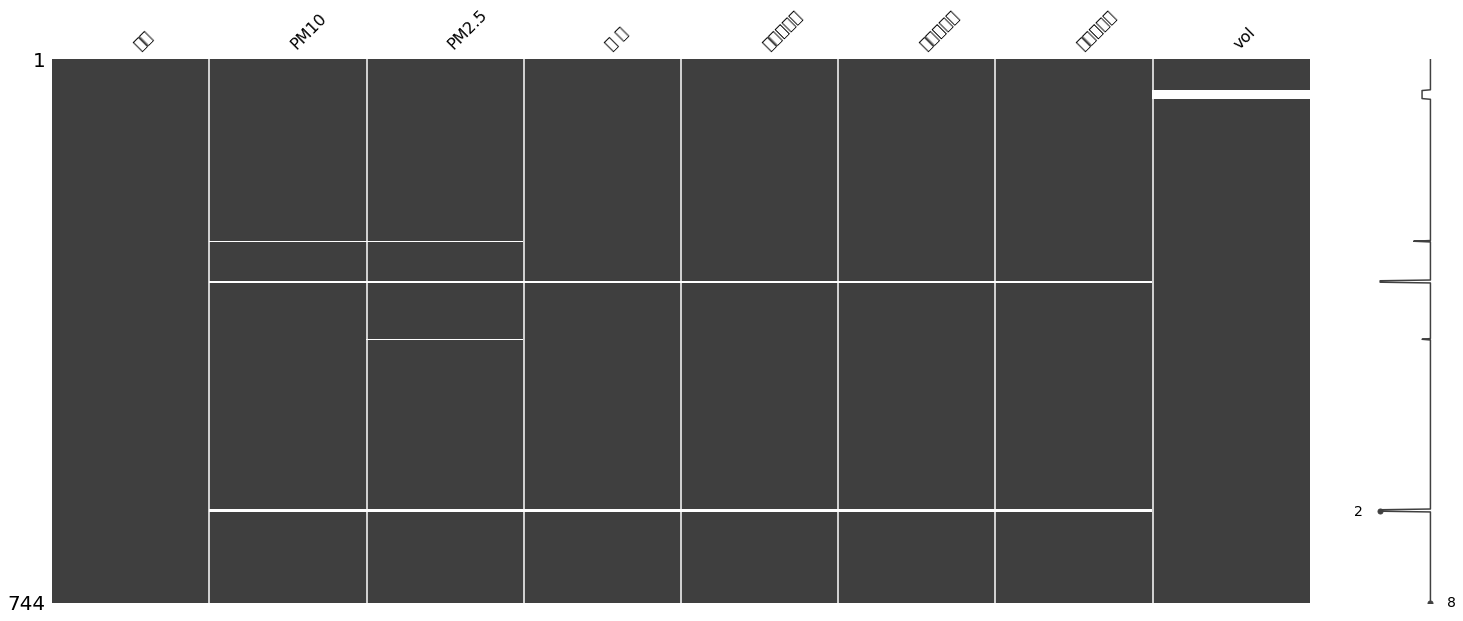

In [92]:
missingno.matrix( rawData ) #결측치 확인

In [93]:
#결측치 확인
rawData[ rawData['vol'].isna() ]

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol
dateTime,,,,,,,,
2021-07-02 19:00:00,07-02-20,23,17,0.040,0.017,0.3,0.003,NaN
2021-07-02 20:00:00,07-02-21,23,19,0.029,0.025,0.3,0.003,NaN
2021-07-02 21:00:00,07-02-22,21,14,0.024,0.022,0.3,0.003,NaN
2021-07-02 22:00:00,07-02-23,19,12,0.020,0.022,0.3,0.003,NaN
2021-07-02 23:00:00,07-02-24,21,12,0.019,0.022,0.3,0.003,NaN
2021-07-03 00:00:00,07-03-01,19,12,0.023,0.015,0.3,0.003,NaN
2021-07-03 01:00:00,07-03-02,17,11,0.026,0.011,0.3,0.003,NaN
2021-07-03 02:00:00,07-03-03,20,10,0.025,0.010,0.3,0.003,NaN
2021-07-03 03:00:00,07-03-04,16,10,0.028,0.008,0.2,0.003,NaN


In [174]:
from datetime import datetime
datetime(2021, 7, 1, hour=18)

datetime.datetime(2021, 7, 1, 18, 0)

In [175]:
rawData.loc[[ datetime(2021, 7, 2, hour=18) ]] #17시 이전의 값으로 결측치 채우기

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_diff
dateTime,,,,,,,,,
2021-07-02 18:00:00,07-02-19,26,16,0.042,0.021,0.3,0.003,686.0,-686.0


In [176]:
rawData.loc[[ datetime(2021, 7, 3, hour=7) ]] # 6시 이후의 값으로 결측치를 채워넣는 방법

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_diff
dateTime,,,,,,,,,
2021-07-03 07:00:00,07-03-08,13,8,0.021,0.017,0.2,0.003,-1870.0,1870.0


17시 이전의 값으로 결측치 채우기 - forward fill

In [177]:
rawData['vol_fill']=rawData['vol'].fillna(method='ffill')

In [178]:
rawData.loc[ datetime(2021, 7, 2, hour=18):datetime(2021, 7, 3, hour=7) ]

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_diff,vol_fill
dateTime,,,,,,,,,,
2021-07-02 18:00:00,07-02-19,26,16,0.042,0.021,0.3,0.003,686.0,-686.0,686.0
2021-07-02 19:00:00,07-02-20,23,17,0.040,0.017,0.3,0.003,-1870.0,1870.0,-1870.0
2021-07-02 20:00:00,07-02-21,23,19,0.029,0.025,0.3,0.003,-1870.0,1870.0,-1870.0
2021-07-02 21:00:00,07-02-22,21,14,0.024,0.022,0.3,0.003,-1870.0,1870.0,-1870.0
2021-07-02 22:00:00,07-02-23,19,12,0.020,0.022,0.3,0.003,-1870.0,1870.0,-1870.0
2021-07-02 23:00:00,07-02-24,21,12,0.019,0.022,0.3,0.003,-1870.0,1870.0,-1870.0
2021-07-03 00:00:00,07-03-01,19,12,0.023,0.015,0.3,0.003,-1870.0,1870.0,-1870.0
2021-07-03 01:00:00,07-03-02,17,11,0.026,0.011,0.3,0.003,-1870.0,1870.0,-1870.0
2021-07-03 02:00:00,07-03-03,20,10,0.025,0.010,0.3,0.003,-1870.0,1870.0,-1870.0


In [179]:
rawData.fillna( method='ffill', inplace=True )
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_diff,vol_fill
dateTime,,,,,,,,,,
2021-07-01 00:00:00,07-01-01,43,28,0.014,0.036,0.5,0.003,369.0,-369.0,369.0
2021-07-01 01:00:00,07-01-02,38,25,0.013,0.029,0.5,0.003,369.0,-369.0,369.0
2021-07-01 02:00:00,07-01-03,37,25,0.014,0.022,0.4,0.003,304.0,-304.0,304.0
2021-07-01 03:00:00,07-01-04,36,23,0.016,0.016,0.4,0.003,158.0,-158.0,158.0
2021-07-01 04:00:00,07-01-05,38,22,0.014,0.016,0.4,0.003,52.0,-52.0,52.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,26,21,0.052,0.015,0.4,0.004,583.0,-583.0,583.0
2021-07-31 20:00:00,07-31-21,26,19,0.042,0.017,0.4,0.004,496.0,-496.0,496.0
2021-07-31 21:00:00,07-31-22,20,14,0.051,0.011,0.4,0.004,-123.0,123.0,-123.0


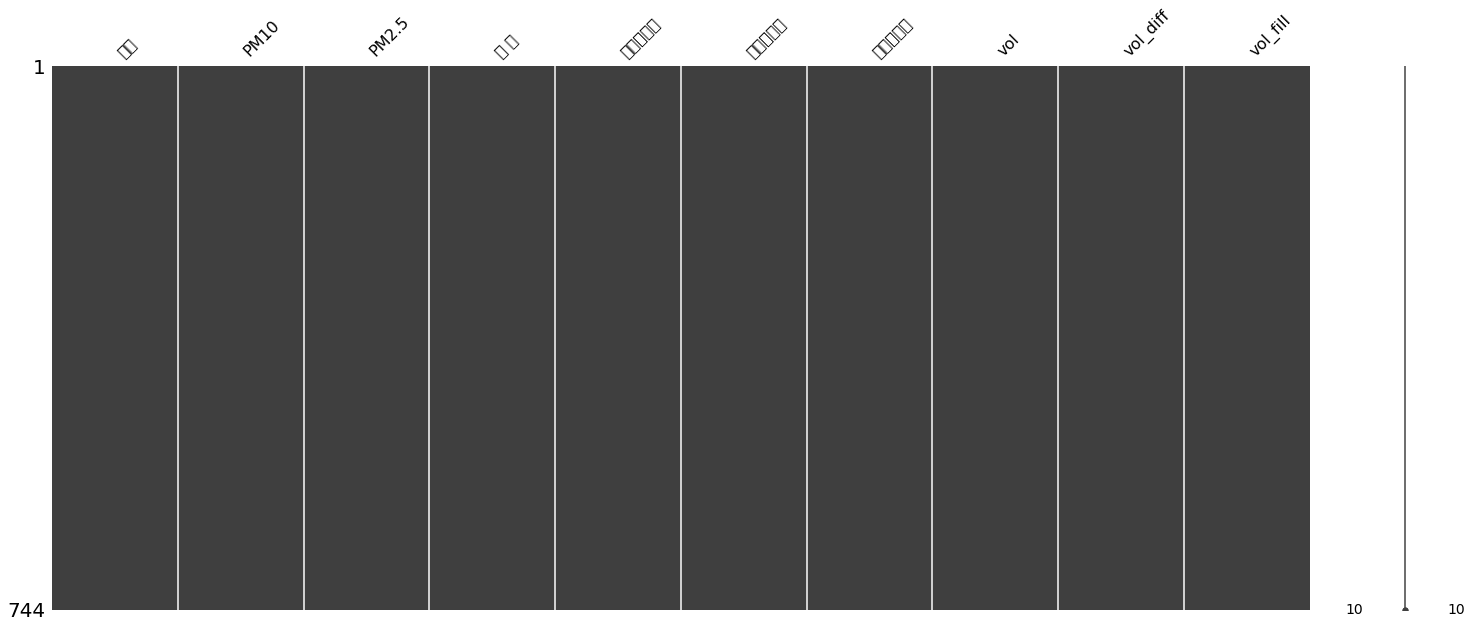

In [180]:
missingno.matrix( rawData ) # 결측치 다 채워짐

교통량 정보 확인

In [181]:
rawData['vol'].unique()

array([ 3.690e+02,  3.040e+02,  1.580e+02,  5.200e+01, -3.800e+02,
       -1.000e+03, -1.477e+03, -2.570e+02, -1.220e+02,  1.210e+02,
       -1.040e+02,  2.060e+02, -1.140e+02,  5.800e+01, -2.590e+02,
        3.570e+02,  6.380e+02,  5.930e+02, -1.730e+02, -3.290e+02,
       -3.260e+02,  3.060e+02,  1.145e+03,  2.530e+02,  3.000e+02,
        4.180e+02,  9.300e+01,  4.800e+01, -3.990e+02, -9.690e+02,
       -1.415e+03, -3.090e+02, -3.500e+01, -6.300e+01, -1.350e+02,
        2.930e+02, -1.940e+02, -3.200e+01,  2.600e+02,  5.000e+01,
        8.190e+02,  6.860e+02, -1.870e+03, -7.950e+02, -3.020e+02,
       -2.160e+02,  4.350e+02, -8.000e+00,  1.330e+02,  2.610e+02,
       -1.580e+02,  6.900e+01,  6.300e+02,  4.870e+02,  1.250e+02,
        9.400e+02,  1.260e+02,  2.390e+02,  3.030e+02,  1.120e+02,
        4.500e+01, -8.900e+01, -3.070e+02, -2.880e+02, -6.140e+02,
       -5.990e+02, -3.660e+02, -3.010e+02, -2.830e+02,  1.220e+02,
        1.830e+02,  1.500e+01, -1.590e+02,  6.110e+02,  2.580e

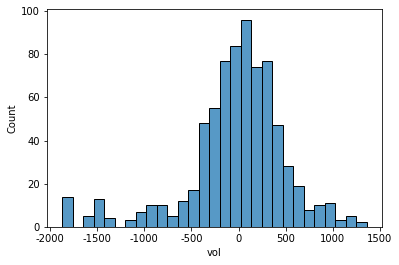

In [182]:
sns.histplot(data=rawData,x='vol')

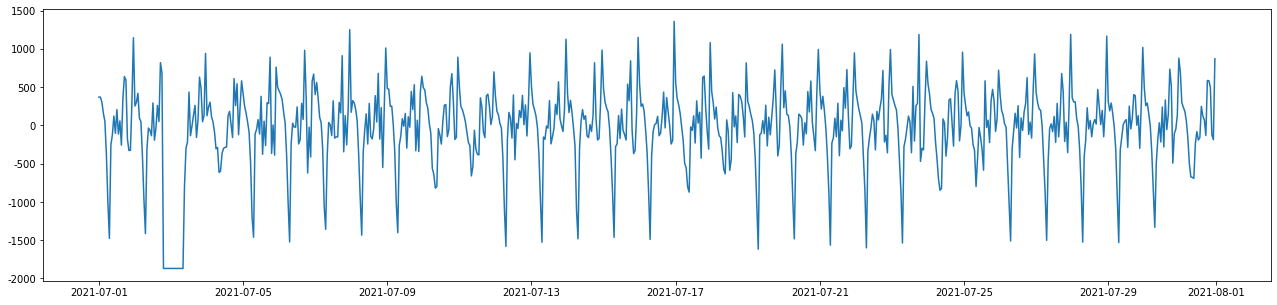

In [183]:
#시간대별 자동차 통행량
plt.figure(figsize=(22,5))
plt.plot(rawData['vol'])

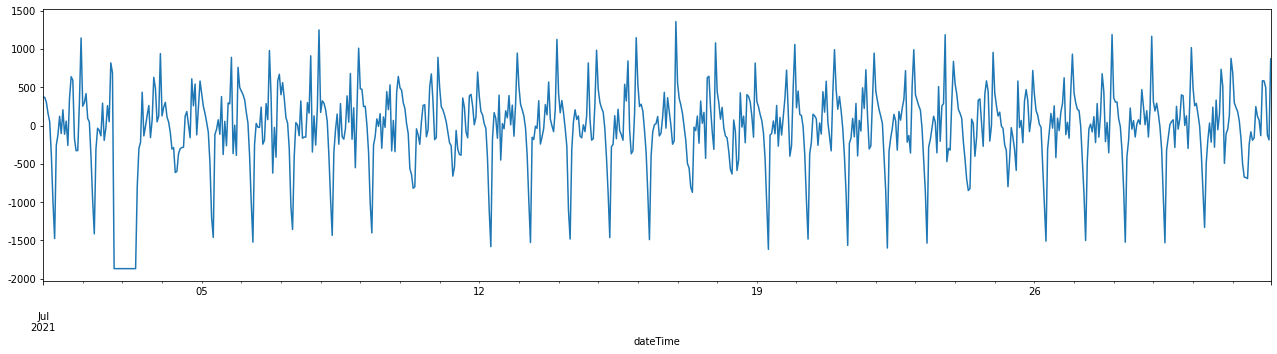

In [184]:
rawData['vol'].plot(kind='line', figsize=(22,5))

미세먼지와 초미세먼지 확인

In [185]:
rawData=rawData.astype({'PM10':'int'})
rawData=rawData.astype({'PM2.5':'int'})

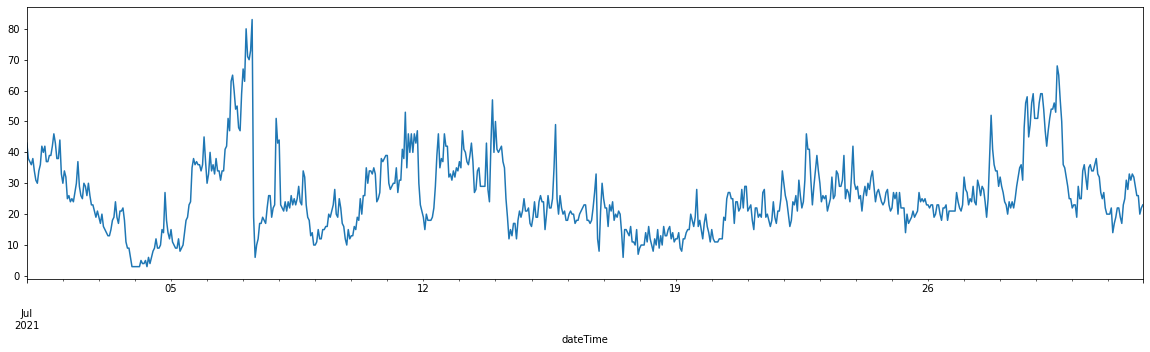

In [186]:
rawData['PM10'].plot( kind='line', figsize=(20,5) )

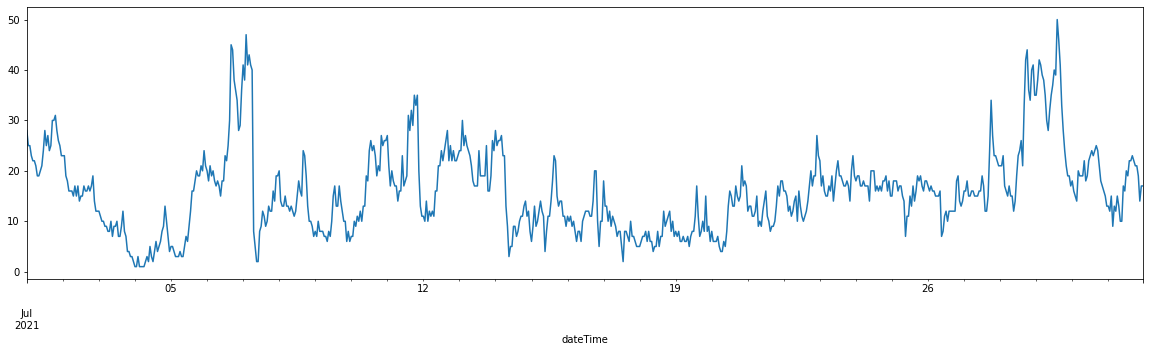

In [187]:
rawData['PM2.5'].plot( kind='line', figsize=(20,5) )

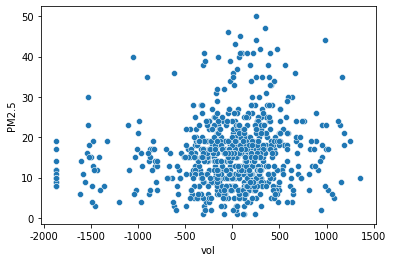

In [188]:
sns.scatterplot(data=rawData, x='vol', y='PM2.5')

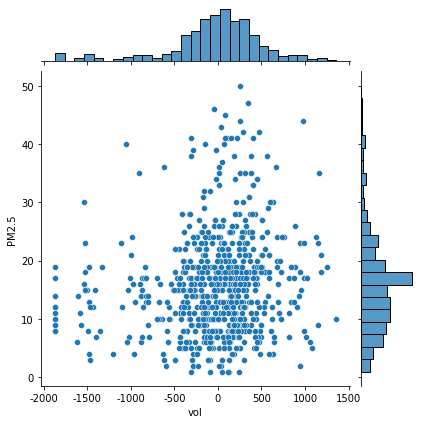

In [189]:
sns.jointplot(data=rawData, x='vol', y='PM2.5')

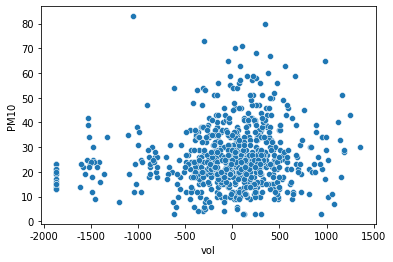

In [190]:
sns.scatterplot(data=rawData, x='vol', y='PM10')

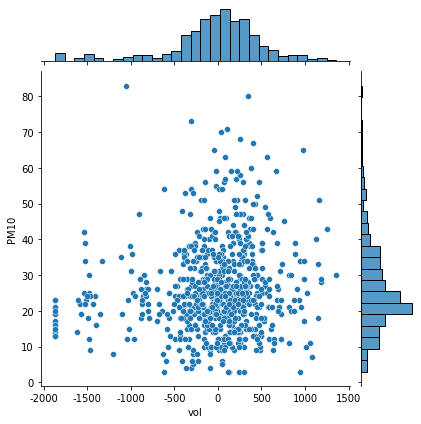

In [191]:
sns.jointplot(data=rawData, x='vol', y='PM10')

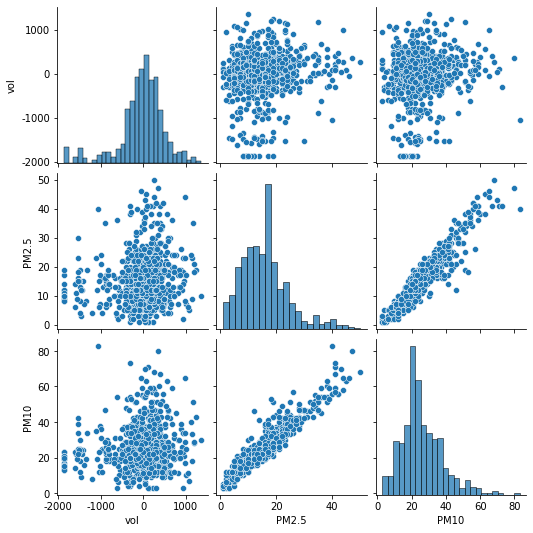

In [192]:
sns.pairplot(data=rawData[['vol','PM2.5','PM10']])

Text(0, 0.5, 'finedust')

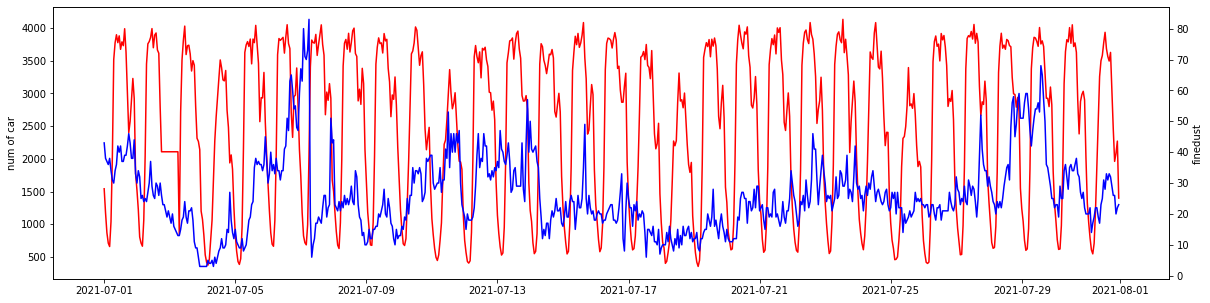

In [140]:
plt.figure(figsize=(20,5))
plt.plot(rawData['vol'],color='red')
plt.ylabel('num of car')

ax=plt.gca()
ax2=ax.twinx() # 단위 다른 두 변수 비교 가능하게 설정
ax2.plot(rawData['PM10'],color='blue')
ax2.set_ylabel('finedust')

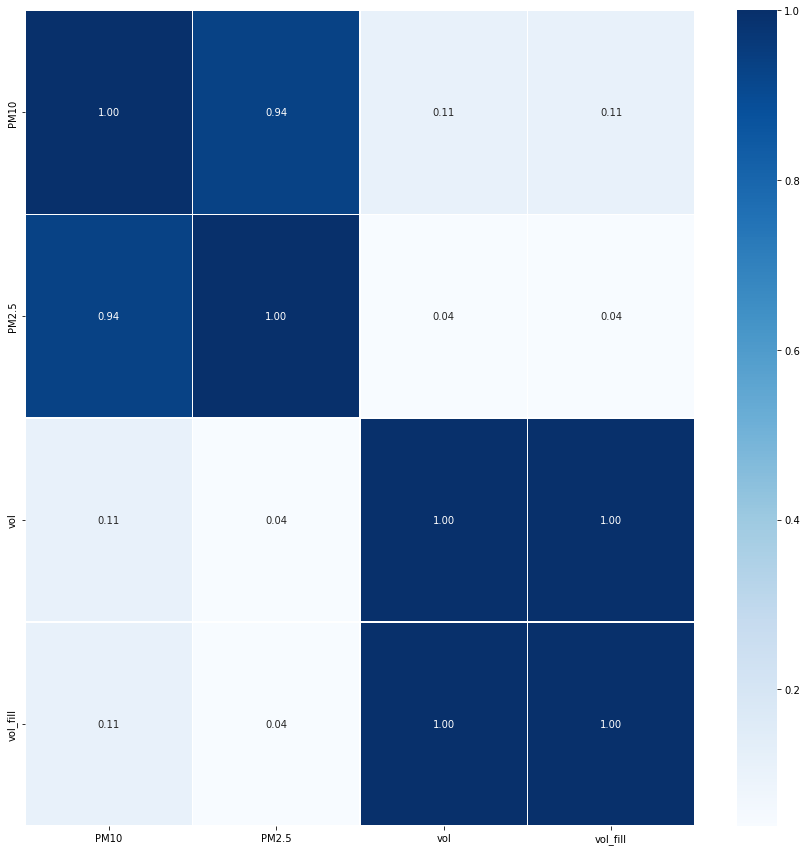

In [130]:
#상관관계 그래프
plt.figure(figsize=(15,15))
sns.heatmap(data = rawData.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [143]:
plt.figure(figsize=(20,5))
plt.plot(rawData['vol'],color='red')
plt.ylabel('num of car')

ax=plt.gca()
ax2=ax.twinx() # 단위 다른 두 변수 비교 가능하게 설정
ax2.plot(rawData['PM10'],color='blue')
ax2.set_ylabel('finedust')

dateTime
2021-07-01 00:00:00       43
2021-07-01 01:00:00       81
2021-07-01 02:00:00      118
2021-07-01 03:00:00      154
2021-07-01 04:00:00      192
                       ...  
2021-07-31 19:00:00    19322
2021-07-31 20:00:00    19348
2021-07-31 21:00:00    19368
2021-07-31 22:00:00    19390
2021-07-31 23:00:00    19413
Freq: H, Name: PM10, Length: 744, dtype: int64

누적합
 - 결과적으론 의미가 없어보임

In [148]:
rawData1=rawData

In [151]:
rawData1['vol']=rawData['vol'].cumsum()
rawData1['PM10']=rawData['PM10'].cumsum()
rawData1['PM2.5']=rawData['PM2.5'].cumsum()
rawData1

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_fill
dateTime,,,,,,,,,
2021-07-01 00:00:00,07-01-01,43,28,0.014,0.036,0.5,0.003,1.542000e+03,1542.0
2021-07-01 01:00:00,07-01-02,124,81,0.013,0.029,0.5,0.003,5.799000e+03,1173.0
2021-07-01 02:00:00,07-01-03,242,159,0.014,0.022,0.4,0.003,1.364000e+04,869.0
2021-07-01 03:00:00,07-01-04,396,260,0.016,0.016,0.4,0.003,2.577600e+04,711.0
2021-07-01 04:00:00,07-01-05,588,383,0.014,0.016,0.4,0.003,4.286600e+04,659.0
...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,7033750,4124504,0.052,0.015,0.4,0.004,1.712543e+11,2456.0
2021-07-31 20:00:00,07-31-21,7053098,4136227,0.042,0.017,0.4,0.004,1.719470e+11,1960.0
2021-07-31 21:00:00,07-31-22,7072466,4147964,0.051,0.011,0.4,0.004,1.726415e+11,2083.0


Text(0, 0.5, 'finedust')

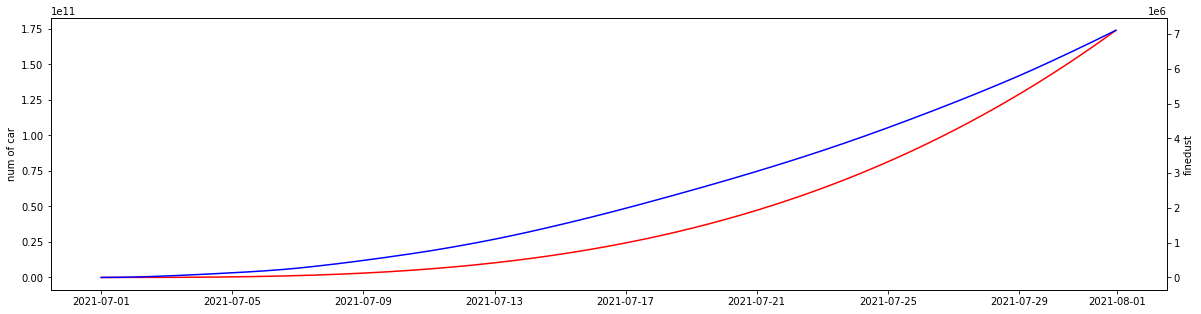

In [152]:
plt.figure(figsize=(20,5))
plt.plot(rawData1['vol'],color='red')
plt.ylabel('num of car')

ax=plt.gca()
ax2=ax.twinx() # 단위 다른 두 변수 비교 가능하게 설정
ax2.plot(rawData1['PM10'],color='blue')
ax2.set_ylabel('finedust')

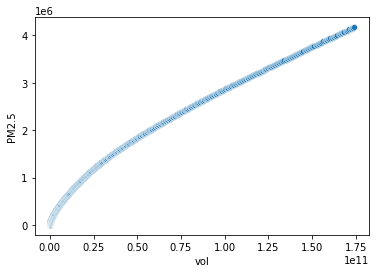

In [153]:
sns.scatterplot(data=rawData1, x='vol', y='PM2.5')

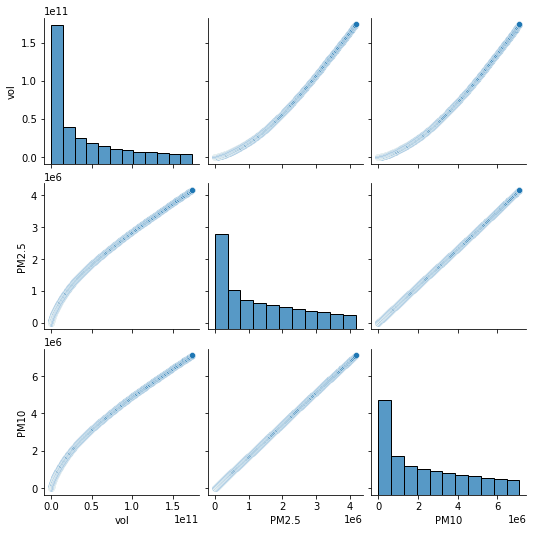

In [154]:
sns.pairplot(data=rawData1[['vol','PM2.5','PM10']])

시간대별 증감
 - 마찬가지로 큰 영향은 없어보임\

In [193]:
rawData['vol_diff'] = rawData['vol'].diff()
rawData['vol_diff'].fillna( method='bfill', inplace=True)

In [194]:
rawData['vol']=-rawData['vol_diff']
rawData

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스,vol,vol_diff,vol_fill
dateTime,,,,,,,,,,
2021-07-01 00:00:00,07-01-01,43,28,0.014,0.036,0.5,0.003,-0.0,0.0,369.0
2021-07-01 01:00:00,07-01-02,38,25,0.013,0.029,0.5,0.003,-0.0,0.0,369.0
2021-07-01 02:00:00,07-01-03,37,25,0.014,0.022,0.4,0.003,65.0,-65.0,304.0
2021-07-01 03:00:00,07-01-04,36,23,0.016,0.016,0.4,0.003,146.0,-146.0,158.0
2021-07-01 04:00:00,07-01-05,38,22,0.014,0.016,0.4,0.003,106.0,-106.0,52.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,07-31-20,26,21,0.052,0.015,0.4,0.004,3.0,-3.0,583.0
2021-07-31 20:00:00,07-31-21,26,19,0.042,0.017,0.4,0.004,87.0,-87.0,496.0
2021-07-31 21:00:00,07-31-22,20,14,0.051,0.011,0.4,0.004,619.0,-619.0,-123.0


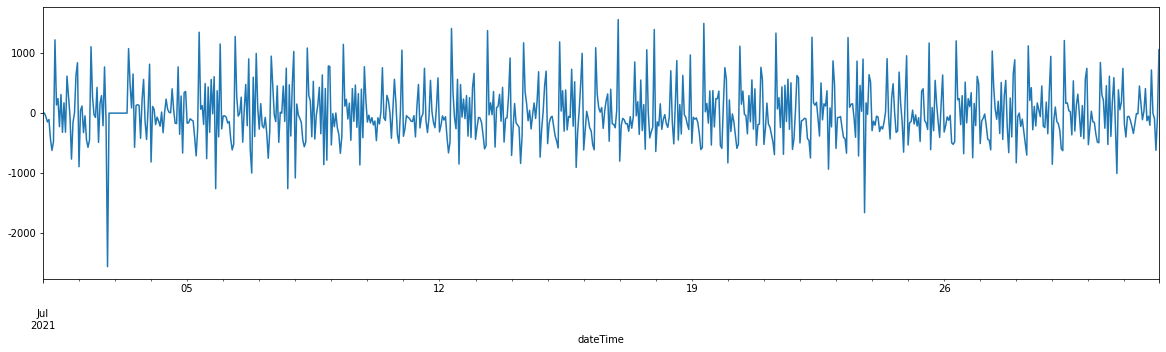

In [195]:
rawData['vol_diff'].plot( kind='line', figsize=(20,5) )

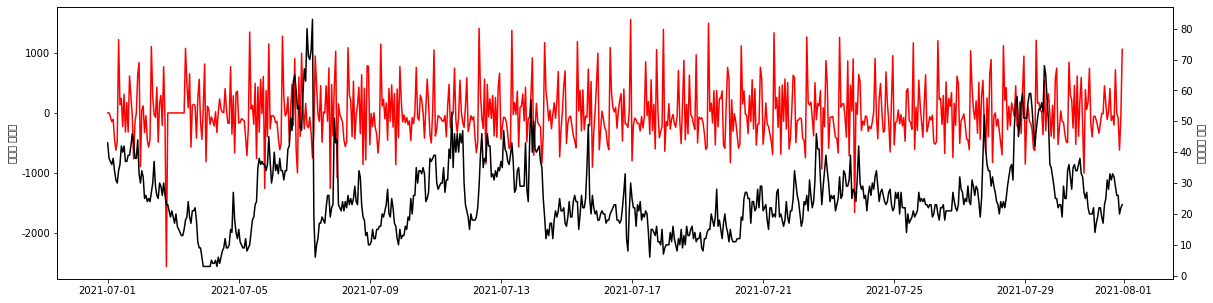

In [196]:
plt.figure( figsize=(20,5) )
plt.plot( rawData['vol_diff'], color='red' )
plt.ylabel('자동차 통행량')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot( rawData['PM10'], color='black' )
ax2.set_ylabel('미세먼지 농도')

plt.show()

데이터 상으론 2021년 7월동안 자동차 통행량과 미세먼지는 큰 연관성은 없어보임.